In [1]:
""" Imports"""

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers, mixed_precision
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
import pathlib
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report, jaccard_score
import numpy as np
import itertools
import random
# from keras_visualizer import visualizer 

from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices())

!nvidia-smi -L


2022-11-17 15:08:21.494875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 15:08:21.620884: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 15:08:22.192217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/nvidia/hpc_sdk/Linux_x86_64/21.11/comm_libs/nccl/lib:/global/common/software/nersc/pm-2021q4/sw/cudnn/8.3.2-cuda11.5/lib:/opt/nvidia/hpc_sdk/Linux_x86_64/21.11/math_libs/11.5/lib64:/opt/nvidia/hpc_sdk/Linux_

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-4eee3451-0016-758a-56a5-2933bdae43fc)
GPU 1: NVIDIA A100-SXM4-40GB (UUID: GPU-e4f1a43d-0123-142e-ef73-e67c00a41723)
GPU 2: NVIDIA A100-SXM4-40GB (UUID: GPU-b18109fe-1963-17d0-4ff5-f88f572e95b2)
GPU 3: NVIDIA A100-SXM4-40GB (UUID: GPU-b66acc08-ee98-2c15-5796-28bdf62e9ae8)


In [ ]:
# Prediction on single image

model_folder = 'Custom_256/'

model = tf.keras.models.load_model(model_folder+'my_model.h5')

checkpoint_path = model_folder+"cp.ckpt"
model.load_weights(checkpoint_path)

model.summary() # Preview model architecture


img_height = 512
img_width = 512

#load test dataset
t_data_dir = './Test_Dataset'
test_dataset = tf.keras.utils.image_dataset_from_directory(
    t_data_dir,
    validation_split=None,
    labels='inferred',
    label_mode='int',
    seed=123,
    shuffle=True,        #or False
    color_mode = 'rgb',
    interpolation='bilinear',
    image_size=(img_height, img_width))

n_test = len(test_dataset.file_paths)
print("Test dataset = ",n_test,"images")


8/8 - 0s - loss: 0.0984 - accuracy: 0.9837 - 420ms/epoch - 52ms/step
Model, accuracy: 98.37%
1/1 [==============================] - 0s 33ms/step


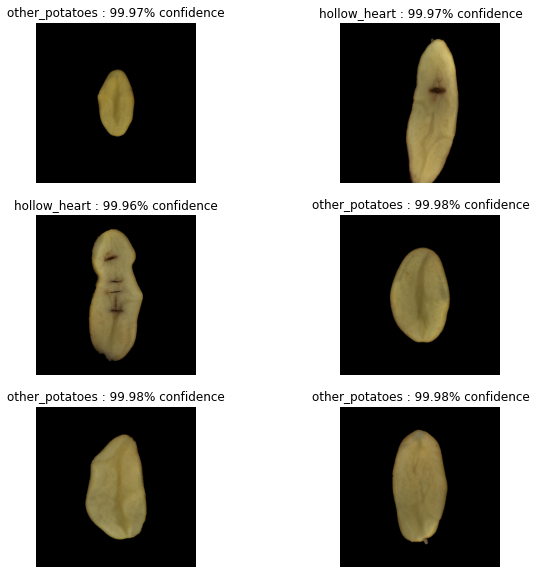

In [5]:
# Evaluate model performance on test set
loss, acc = model.evaluate(test_dataset, verbose=2)
print("Model, accuracy: {:5.2f}%".format(100 * acc))

# predicted = model.predict(test_dataset)
# y_classes = predicted.argmax(axis=-1)

# test_label = np.concatenate([y for x, y in test_dataset], axis=0) 
# real = test_label
# cm = confusion_matrix(y_classes, real)
# classes = test_dataset.class_names

# print(classification_report(real,y_classes)) # F1 Score, Precision Score, Recall Score

# j_index = jaccard_score(real,y_classes,average='micro') # jaccard score
# print('Jaccard Score = ',round(j_index,2))

class_names = test_dataset.class_names
plt.figure(figsize=(10, 10))
rand_idx = random.sample(range(n_test),6) #preview 6 random images
for i in range(6):
    file_path = test_dataset.file_paths[rand_idx[i]]
    img = tf.keras.utils.load_img(
        file_path, target_size=(img_height, img_width)
    )

    imgg = np.array(img, dtype = "uint8")

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])


    ax = plt.subplot(3, 2, i + 1)
    plt.imshow(imgg)
    plt.title(class_names[np.argmax(score)]+' : ' + str(round(100 * np.max(score),2))+ '% confidence')
    plt.axis("off")